In [168]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [169]:
train = pd.read_csv('bigdatamart_Train.csv')
test = pd.read_csv('bigdatamart_Test.csv')

In [170]:
train.shape

(8523, 12)

In [171]:
test.shape

(5681, 11)

In [172]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [173]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [174]:
#We need to predict Item_Outlet_Sales for given test data
#lets first merge the train and test data for Exploratory Data Analysis

In [175]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 13) (14204, 13)


In [176]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

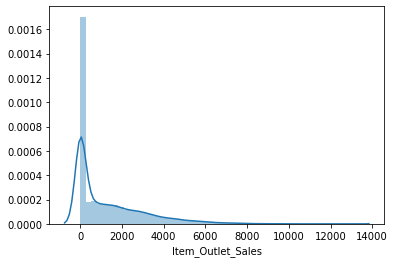

In [177]:
sns.distplot(data['Item_Outlet_Sales'])

In [178]:
#Deviate from the normal distribution and have positive skewedness


In [179]:
print('Skewness: %f' % data['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %data['Item_Outlet_Sales'].kurt())

Skewness: 1.544684
Kurtsis: 2.419439


In [180]:
# numerical and categorial variables

In [181]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [182]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


In [183]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [184]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [185]:
#Missing Values

In [186]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [187]:
#Item_Visibility has a min value of zero.

#Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.

#The lower ‘count’ of Item_Weight and Outlet_Size confirms the findings from the missing value check.

In [188]:
data.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [189]:
#This tells us that there are 1559 products and 10 outlets/stores (which was also mentioned in problem statement). Another thing that should catch attention is that Item_Type has 16 unique values. 
#Let’s explore further using the frequency of different categories in each nominal variable

In [190]:
#frequency of categories
for col in categorial_features:
    print('\n%s column: '%col)
    print(data[col].value_counts())


Item_Identifier column: 
FDE24    10
FDC22    10
FDP39    10
NCK29    10
DRD24    10
         ..
FDM52     7
DRN11     7
NCL42     7
FDH58     7
FDR51     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column: 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type column: 
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Identifier column: 
OUT027    1559
OUT013    1553
OUT035    1550
OUT049    1550
OUT046    1550
OUT045    1548


In [191]:
# Outlet_Size, Outlet_Location_Type, and Outlet_Type distribution in Item_Outlet_Sale

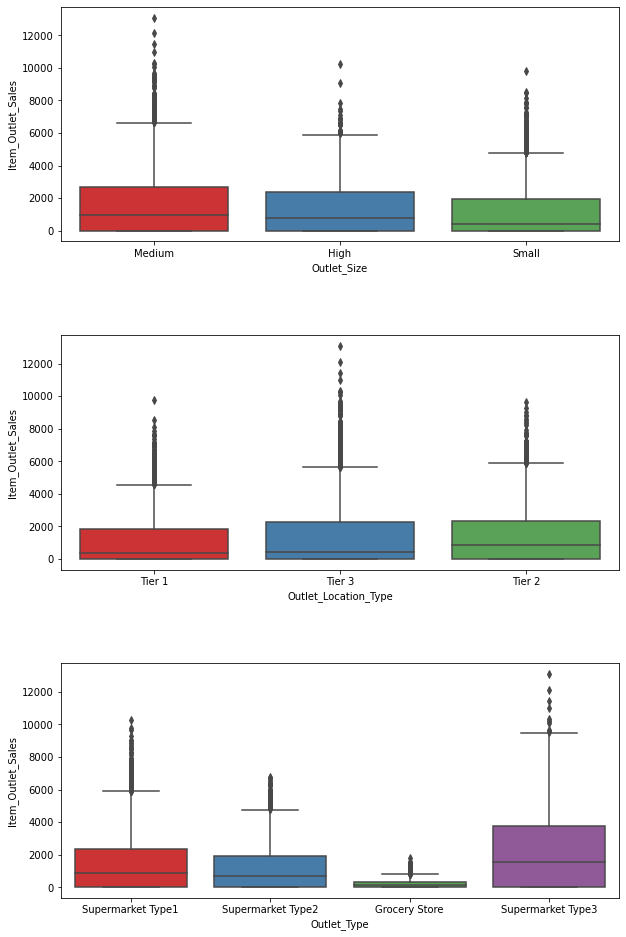

In [192]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

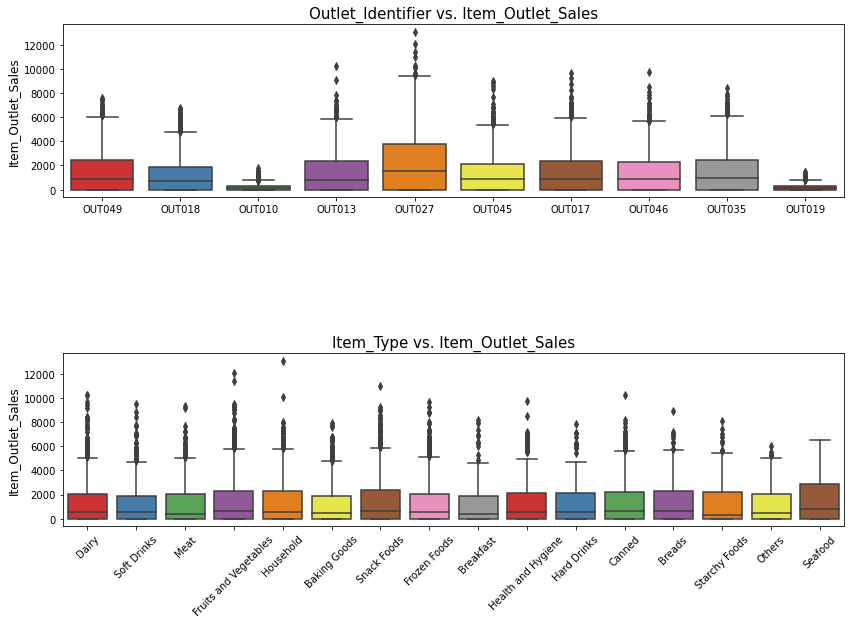

In [193]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [194]:
#Data Cleaning and Imputing Missing Values


In [195]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

missing_values = data['Item_Weight'].isnull()
print('Missing values: %d' %sum(missing_values))

data.loc[missing_values,'Item_Weight']  = data.loc[missing_values,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])
print('Missing values after immputation %d' %sum(data['Item_Weight'].isnull()))

Missing values: 2439
Missing values after immputation 0


In [196]:
#This confirms that the column has no missing values now. 
#Lets impute Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.

In [197]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x.astype('str')).mode[0]))
print ('Mode for each Outlet_Type:')
print (outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
missing_values = data['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal #missing: %d'% sum(missing_values))
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print (sum(data['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size           nan             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 4016
0


In [198]:
#Modify item visibility
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [199]:
#Create a broad category of Type of Item. If we look at the Item_Identifier, i.e. the unique ID of each item, 
#it starts with either FD, DR or NC. Looking at the categories, these look like being Food, Drinks and Non-Consumables.Combining them 

In [200]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable', 'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [201]:
#Modify categories of Item_Fat_Content

#We found typos and difference in representation in categories of Item_Fat_Content variable. This can be corrected as:

In [202]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [203]:
#Data visualization for ITEM_type_combined and Item_fat_content vs outlet sales

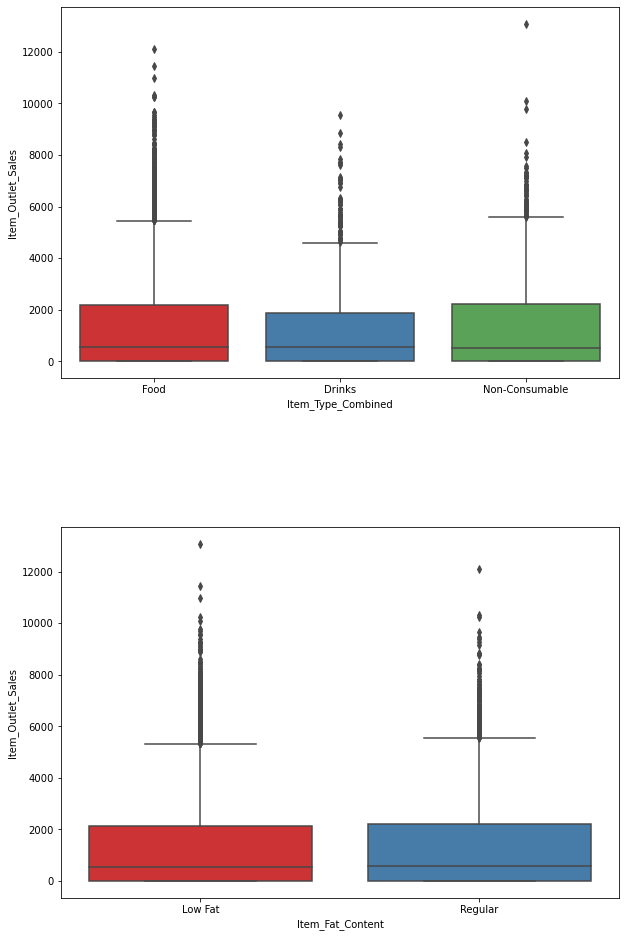

In [204]:
plt.figure(figsize = (10,9))

plt.subplot(211)
sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(212)
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

In [205]:
#Numerical and One-Hot Coding of Categorical variables

In [206]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [207]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [208]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Size_3                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [209]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_1']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_1
0,1,0,0
1,0,1,1
2,1,0,0
3,0,1,1
4,1,0,0
5,0,1,1
6,0,1,1
7,1,0,0
8,0,1,1
9,0,1,1


In [210]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

C:\Users\sarmi\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [211]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Identifier         8523 non-null   object 
 1   Item_Weight             8523 non-null   float64
 2   Item_Visibility         8523 non-null   float64
 3   Item_MRP                8523 non-null   float64
 4   Outlet_Identifier       8523 non-null   object 
 5   Item_Outlet_Sales       8523 non-null   float64
 6   Item_Fat_Content_0      8523 non-null   uint8  
 7   Item_Fat_Content_1      8523 non-null   uint8  
 8   Outlet_Location_Type_0  8523 non-null   uint8  
 9   Outlet_Location_Type_1  8523 non-null   uint8  
 10  Outlet_Location_Type_2  8523 non-null   uint8  
 11  Outlet_Size_0           8523 non-null   uint8  
 12  Outlet_Size_1           8523 non-null   uint8  
 13  Outlet_Size_2           8523 non-null   uint8  
 14  Outlet_Size_3           8523 non-null   

In [212]:
# Model building

In [213]:
train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.300,0.016047,249.8092,OUT049,3735.1380,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.920,0.019278,48.2692,OUT018,443.4228,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.500,0.016760,141.6180,OUT049,2097.2700,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.200,0.017834,182.0950,OUT010,732.3800,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0.009780,53.8614,OUT013,994.7052,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,OUT013,2778.3834,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,FDS36,8.380,0.046982,108.1570,OUT045,549.2850,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,OUT035,1193.1136,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8521,FDN46,7.210,0.145221,103.1332,OUT018,1845.5976,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [214]:
test

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,20.750,0.007565,107.8622,OUT049,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.300,0.038428,87.3198,OUT017,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.600,0.099575,241.7538,OUT010,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315,0.015388,155.0340,OUT017,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,13.600,0.118599,234.2300,OUT027,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,0.013496,141.3154,OUT046,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5677,FDD47,7.600,0.142991,169.1448,OUT018,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5678,NCO17,10.000,0.073529,118.7440,OUT045,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5679,FDJ26,15.300,0.088380,214.6218,OUT017,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [218]:
#Dropping columns which wont affect modelling
X_train=train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train=train['Item_Outlet_Sales']
X_test=test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

In [219]:
#Linear Regression

In [220]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [221]:
lr_pred=lr.predict(X_test)

In [222]:
lr_accuracy=round(lr.score(X_train,y_train)*100)

In [223]:
lr_accuracy

56.0

In [224]:
#Decision tree Regressor

In [225]:
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)

tree.fit(X_train,y_train)
tree_pred=tree.predict(X_test)

In [226]:
tree_accuracy=round(tree.score(X_train,y_train)*100)
tree_accuracy

61.0

In [228]:
#RandomForestProgressor

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)

rf.fit(X_train,y_train)
rf_pred=tree.predict(X_test)
rf_pred


array([1690.23408624, 1481.85061417,  584.75776477, ..., 1827.83284545,
       3737.29577518, 1243.06892977])

In [229]:
rf_accuracy=round(rf.score(X_train,y_train)*100)
rf_accuracy

61.0

In [230]:
from xgboost import XGBRegressor
model=XGBRegressor(n_estimators=1000,learning_rate=0.05)

In [231]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [232]:
y_pred=model.predict(X_test)
y_pred

array([1544.6816, 1236.4326,  883.3942, ..., 1726.052 , 3381.2131,
       1483.5366], dtype=float32)

In [233]:
model.score(X_train,y_train)*100

87.18909533761233

In [234]:
#Model saving.XGBRegressor seems to be performing the best among the other models .

In [238]:

import pickle
filename='sales.pkl'
pickle.dump(model,open(filename,'wb'))

In [ ]:
#Conclusion